### There will be 3 visualisations:
* 1. Top Performing Products (Matplotlib)
* 2. Customer Behaviour by Country (Seaborn)
* 3. Transactions Over Time (Plotly)

### 1. Top Performing Products Using Matplotlib
Purpose: Identify the best-selling products by total quantity ordered.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Data/Cleaned/Cleaned_Online_Retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTransactionValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Group by product(Description) and sum quantities

In [5]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products



Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53751
JUMBO BAG RED RETROSPOT               47260
POPCORN HOLDER                        36322
ASSORTED COLOUR BIRD ORNAMENT         36282
PACK OF 72 RETROSPOT CAKE CASES       36016
WHITE HANGING HEART T-LIGHT HOLDER    35298
RABBIT NIGHT LIGHT                    30631
MINI PAINT SET VINTAGE                26437
PACK OF 12 LONDON TISSUES             26299
PACK OF 60 PINK PAISLEY CAKE CASES    24719
Name: Quantity, dtype: int64

Creating visualisation using bar chart for Top 10 Products

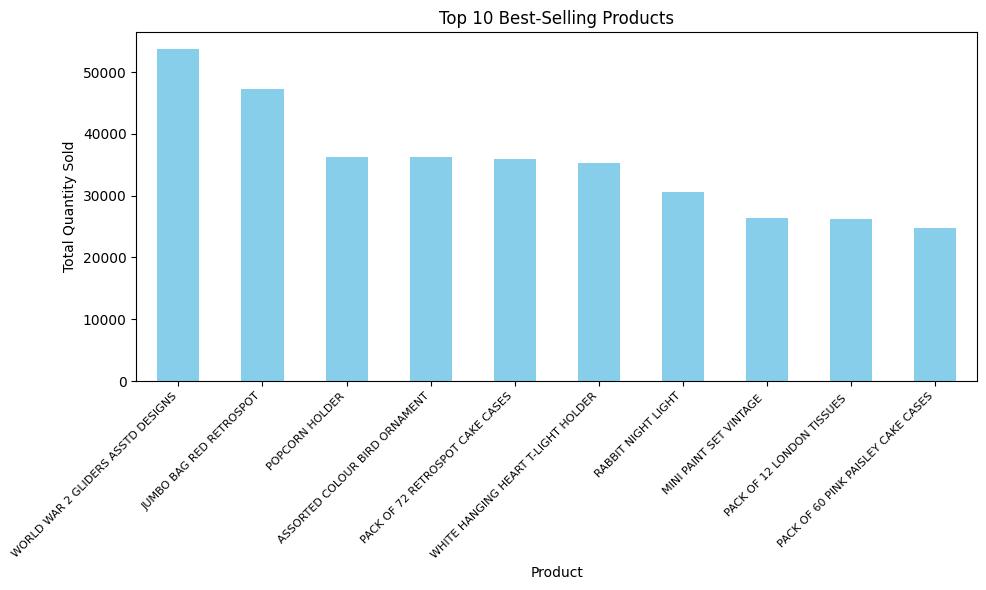

In [8]:
plt.figure(figsize=(10,6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

### 2. Creating visualisation with Seaborn to showcase Customer Behaviour by Country (Top 10)
Purpose: 

In [9]:
import seaborn as sns


In [10]:
country_sales = df.groupby('Country')['TotalTransactionValue'].sum().sort_values(ascending=False).head(10).reset_index()

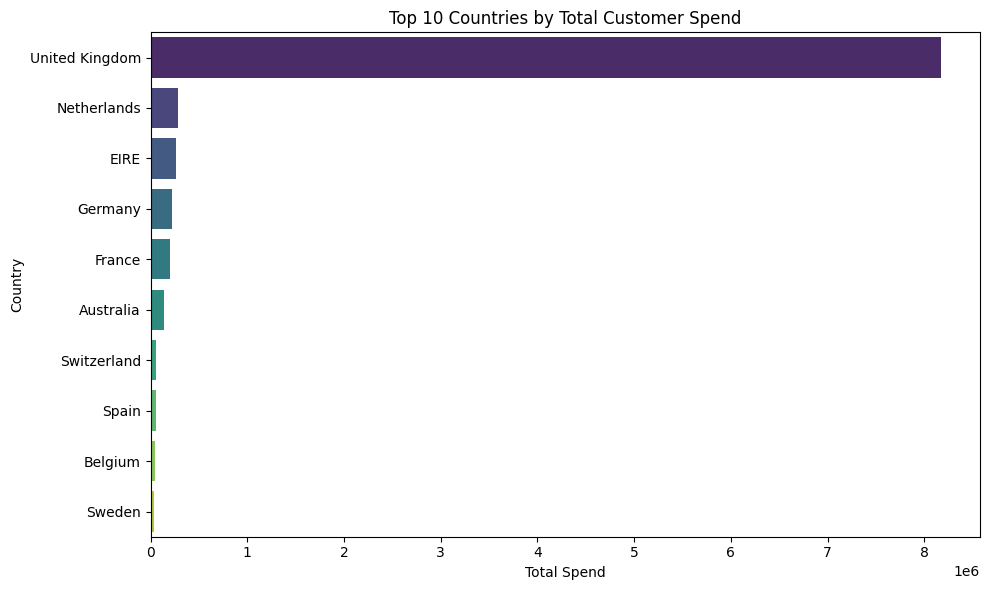

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=country_sales, 
    x='TotalTransactionValue', 
    y='Country', 
    hue='Country',               
    palette='viridis',
    dodge=False,                 
    legend=False  
)
plt.title('Top 10 Countries by Total Customer Spend')
plt.xlabel('Total Spend')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

### 3. Creating visualisation with Plotlib for transaction over time
Purpose: Show transaction frequency or revenue trends over time.

In [17]:
import plotly.express as px

In [26]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

daily_transactions = (
    df.resample('D', on='InvoiceDate')['InvoiceNo']
      .nunique()
      .reset_index()
)
daily_transactions.columns = ['Date', 'UniqueTransactions']

fig = px.line(
    daily_transactions,
    x='Date',
    y='UniqueTransactions',
    title='Daily Number of Transactions Over Time',
    labels={'UniqueTransactions': 'Number of Transactions'}
)
fig.update_xaxes(rangeslider_visible=True)  # Optional: adds an interactive range slider
fig.show()

/Users/emcsi/Documents/GitHub/Online-Retail-Transaction-Analysis/.venv/lib/python3.12/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed